## Imports

In [3]:
import pandas as pd
import numpy as np
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
from itables import init_notebook_mode
import itables
import warnings
warnings.filterwarnings("ignore", "use_inf_as_na")
import plotly.express as px
#init_notebook_mode(all_interactive=True)



## Ładowanie danych

In [4]:
df = pd.read_excel('data/who_aap_2021_v9_11august2022.xlsx', sheet_name='AAP_2022_city_v9')

In [5]:
df.columns

Index(['WHO Region', 'ISO3', 'WHO Country Name', 'City or Locality',
       'Measurement Year', 'PM2.5 (μg/m3)', 'PM10 (μg/m3)', 'NO2 (μg/m3)',
       'PM25 temporal coverage (%)', 'PM10 temporal coverage (%)',
       'NO2 temporal coverage (%)', 'Reference',
       'Number and type of monitoring stations', 'Version of the database',
       'Status'],
      dtype='object')

## Przegląd danych

In [6]:
itables.show(df)

Biblioteka ITables 2.0 stanowi użyteczne narzędzie - można przeglądać dane łatwiej niż za pomocą scrollowania i zadecydować ile chcemy ich widzieć na raz. Nie jest ona bezwzględnie potrzebna do analizy danych, ale na pewno stanowi ułatwienie pod względem czytelności i przejrzystości. 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32191 entries, 0 to 32190
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   WHO Region                              32190 non-null  object 
 1   ISO3                                    32191 non-null  object 
 2   WHO Country Name                        32191 non-null  object 
 3   City or Locality                        32191 non-null  object 
 4   Measurement Year                        32191 non-null  int64  
 5   PM2.5 (μg/m3)                           15048 non-null  float64
 6   PM10 (μg/m3)                            21109 non-null  float64
 7   NO2 (μg/m3)                             22200 non-null  float64
 8   PM25 temporal coverage (%)              7275 non-null   float64
 9   PM10 temporal coverage (%)              5381 non-null   float64
 10  NO2 temporal coverage (%)               19890 non-null  fl

In [8]:
df.describe()

Measurement Year  PM2.5 (μg/m3)  PM10 (μg/m3)   NO2 (μg/m3)  \
count      32191.000000   15048.000000  21109.000000  22200.000000   
mean        2015.579354      22.920320     30.533252     20.619336   
std            2.752654      17.925906     29.312756     12.133388   
min         2000.000000       0.010000      1.040000      0.000000   
25%         2014.000000      10.350000     16.980000     12.000000   
50%         2016.000000      16.000000     22.000000     18.800000   
75%         2018.000000      31.000000     31.300000     27.160000   
max         2021.000000     191.900000    540.000000    210.680000   

       PM25 temporal coverage (%)  PM10 temporal coverage (%)  \
count                 7275.000000                 5381.000000   
mean                    90.794096                   90.583500   
std                     14.872681                   13.816311   
min                      0.000000                    2.568493   
25%                     88.595890                   87.945205   
50%                     97.000000                   96.039000   
75%                     99.000000                   98.938000   
max                    100.000000                  100.000000   

       NO2 temporal coverage (%)  Version of the database  Status  
count               19890.000000             32191.000000     0.0  
mean                   93.696804              2021.744214     NaN  
std                    10.451751                 1.051897     NaN  
min                     1.923077              2016.000000     NaN  
25%                    93.207763              2022.000000     NaN  
50%                    96.369863              2022.000000     NaN  
75%                    98.926941              2022.000000     NaN  
max                   100.000000              2022.000000     NaN

Mimo widocznych wartości odstających zdecydowano o nieusuwaniu ich, ponieważ mogłoby to uniemożliwić zaobserwowanie ważnych wniosków - zanieczyszczenia mogą być na pewnych terenach ekstremalne.

## Wartości NaN

In [9]:
print("Ilość wszystkich wierszy:", len(df))
df.isna().sum()

Ilość wszystkich wierszy: 32191


WHO Region                                    1
ISO3                                          0
WHO Country Name                              0
City or Locality                              0
Measurement Year                              0
PM2.5 (μg/m3)                             17143
PM10 (μg/m3)                              11082
NO2 (μg/m3)                                9991
PM25 temporal coverage (%)                24916
PM10 temporal coverage (%)                26810
NO2 temporal coverage (%)                 12301
Reference                                     5
Number and type of monitoring stations    23433
Version of the database                       0
Status                                    32191
dtype: int64

Kolumna Status składa się tylko z NaN - można ją bezpiecznie usunąć. Kolumny WHO Region i Reference mają bardzo małą ilość NaN (<5%), te wiersze można wypełnić odpowiednimi informacjami (WHO Region - European Region dla Liechtensteinu) lub usunąć (Reference - brak informacji o tym, jak je wypełnić). Inne kolumny mają wiele wartości NaN (około > 10 000), więc zostaną pozostawione bez zmian. Są to najważniejsze kolumny dotyczące parametrów PM2.5, PM10 oraz NO2, więc można domyślać się, że istnieją braki w odczytywanych wartościach na czujnikach. Niestety sporo danych dotyczących pokrycia (części roku, w której zbierane są dane) również brakuje.

In [10]:
df.drop(columns=['Status'], inplace=True)

In [11]:
print(df["WHO Region"].unique()) 
df.loc[df["WHO Region"].isna(), "WHO Region"] = 'European Region'

['Eastern Mediterranean Region' 'European Region' 'Region of the Americas'
 'Western Pacific Region' 'South East Asia Region' 'African Region' nan]


In [12]:
df.loc[df["Reference"].isna(), :] # ISO3 = QAT

WHO Region ISO3 WHO Country Name City or Locality  \
28209  Eastern Mediterranean Region  QAT            Qatar             Doha   
28210  Eastern Mediterranean Region  QAT            Qatar             Doha   
28211  Eastern Mediterranean Region  QAT            Qatar             Doha   
28212  Eastern Mediterranean Region  QAT            Qatar             Doha   
28213  Eastern Mediterranean Region  QAT            Qatar             Doha   

       Measurement Year  PM2.5 (μg/m3)  PM10 (μg/m3)  NO2 (μg/m3)  \
28209              2017           44.0         148.0         29.0   
28210              2018           44.0         181.0         47.0   
28211              2019           41.0         208.0         42.0   
28212              2020           33.0         108.0         28.0   
28213              2021           38.0         150.0         30.0   

       PM25 temporal coverage (%)  PM10 temporal coverage (%)  \
28209                        98.0                        96.0   
28210                        99.0                        97.0   
28211                        97.0                        97.0   
28212                        98.0                        98.0   
28213                        97.0                        96.0   

       NO2 temporal coverage (%) Reference  \
28209                       99.0       NaN   
28210                       99.0       NaN   
28211                       99.0       NaN   
28212                       99.0       NaN   
28213                       99.0       NaN   

          Number and type of monitoring stations  Version of the database  
28209  Roadside, residential and commercial area                     2022  
28210  Roadside, residential and commercial area                     2022  
28211  Roadside, residential and commercial area                     2022  
28212  Roadside, residential and commercial area                     2022  
28213  Roadside, residential and commercial area                     2022

In [13]:
df.loc[df["ISO3"]=="QAT", :]

WHO Region ISO3 WHO Country Name City or Locality  \
28208  Eastern Mediterranean Region  QAT            Qatar         Al-Bidda   
28209  Eastern Mediterranean Region  QAT            Qatar             Doha   
28210  Eastern Mediterranean Region  QAT            Qatar             Doha   
28211  Eastern Mediterranean Region  QAT            Qatar             Doha   
28212  Eastern Mediterranean Region  QAT            Qatar             Doha   
28213  Eastern Mediterranean Region  QAT            Qatar             Doha   
28214  Eastern Mediterranean Region  QAT            Qatar   Madinat Khaifa   
28215  Eastern Mediterranean Region  QAT            Qatar         Muaither   

       Measurement Year  PM2.5 (μg/m3)  PM10 (μg/m3)  NO2 (μg/m3)  \
28208              2016           33.0         110.0          NaN   
28209              2017           44.0         148.0         29.0   
28210              2018           44.0         181.0         47.0   
28211              2019           41.0         208.0         42.0   
28212              2020           33.0         108.0         28.0   
28213              2021           38.0         150.0         30.0   
28214              2016           45.0         189.0          NaN   
28215              2016           36.0         120.0          NaN   

       PM25 temporal coverage (%)  PM10 temporal coverage (%)  \
28208                         NaN                         NaN   
28209                        98.0                        96.0   
28210                        99.0                        97.0   
28211                        97.0                        97.0   
28212                        98.0                        98.0   
28213                        97.0                        96.0   
28214                         NaN                         NaN   
28215                         NaN                         NaN   

       NO2 temporal coverage (%)                                    Reference  \
28208                        NaN  Ministry of Municipal and Environment (MME)   
28209                       99.0                                          NaN   
28210                       99.0                                          NaN   
28211                       99.0                                          NaN   
28212                       99.0                                          NaN   
28213                       99.0                                          NaN   
28214                        NaN             Ministry of Public Health (MOPH)   
28215                        NaN  Ministry of Municipal and Environment (MME)   

          Number and type of monitoring stations  Version of the database  
28208                                residential                     2018  
28209  Roadside, residential and commercial area                     2022  
28210  Roadside, residential and commercial area                     2022  
28211  Roadside, residential and commercial area                     2022  
28212  Roadside, residential and commercial area                     2022  
28213  Roadside, residential and commercial area                     2022  
28214                                residential                     2018  
28215                                residential                     2018

In [14]:
df.dropna(subset=["Reference"],inplace=True)

In [15]:
# Double-check
print("Number of rows in the dataframe:", len(df))
df.isna().sum()

Number of rows in the dataframe: 32186


WHO Region                                    0
ISO3                                          0
WHO Country Name                              0
City or Locality                              0
Measurement Year                              0
PM2.5 (μg/m3)                             17143
PM10 (μg/m3)                              11082
NO2 (μg/m3)                                9991
PM25 temporal coverage (%)                24916
PM10 temporal coverage (%)                26810
NO2 temporal coverage (%)                 12301
Reference                                     0
Number and type of monitoring stations    23433
Version of the database                       0
dtype: int64

Dodatkowa selekcja cech - zdecydowano odrzucić kolumnę Version Of The Database, ponieważ nie wnosi ona nic merytorycznego do analizy.

In [16]:
df.drop(columns=["Version of the database"], inplace=True)

## Wizualizacje

Poniżej przedstawiono podstawowe wizualizacje danych (pairplot, histplot, heatmap), aby lepiej zrozumieć ich charakter przed dalszą analizą. Przedstawiono również jak wyglądają zanieczyszczenia dla poszczególnych lat i jak wyglądał coverage.

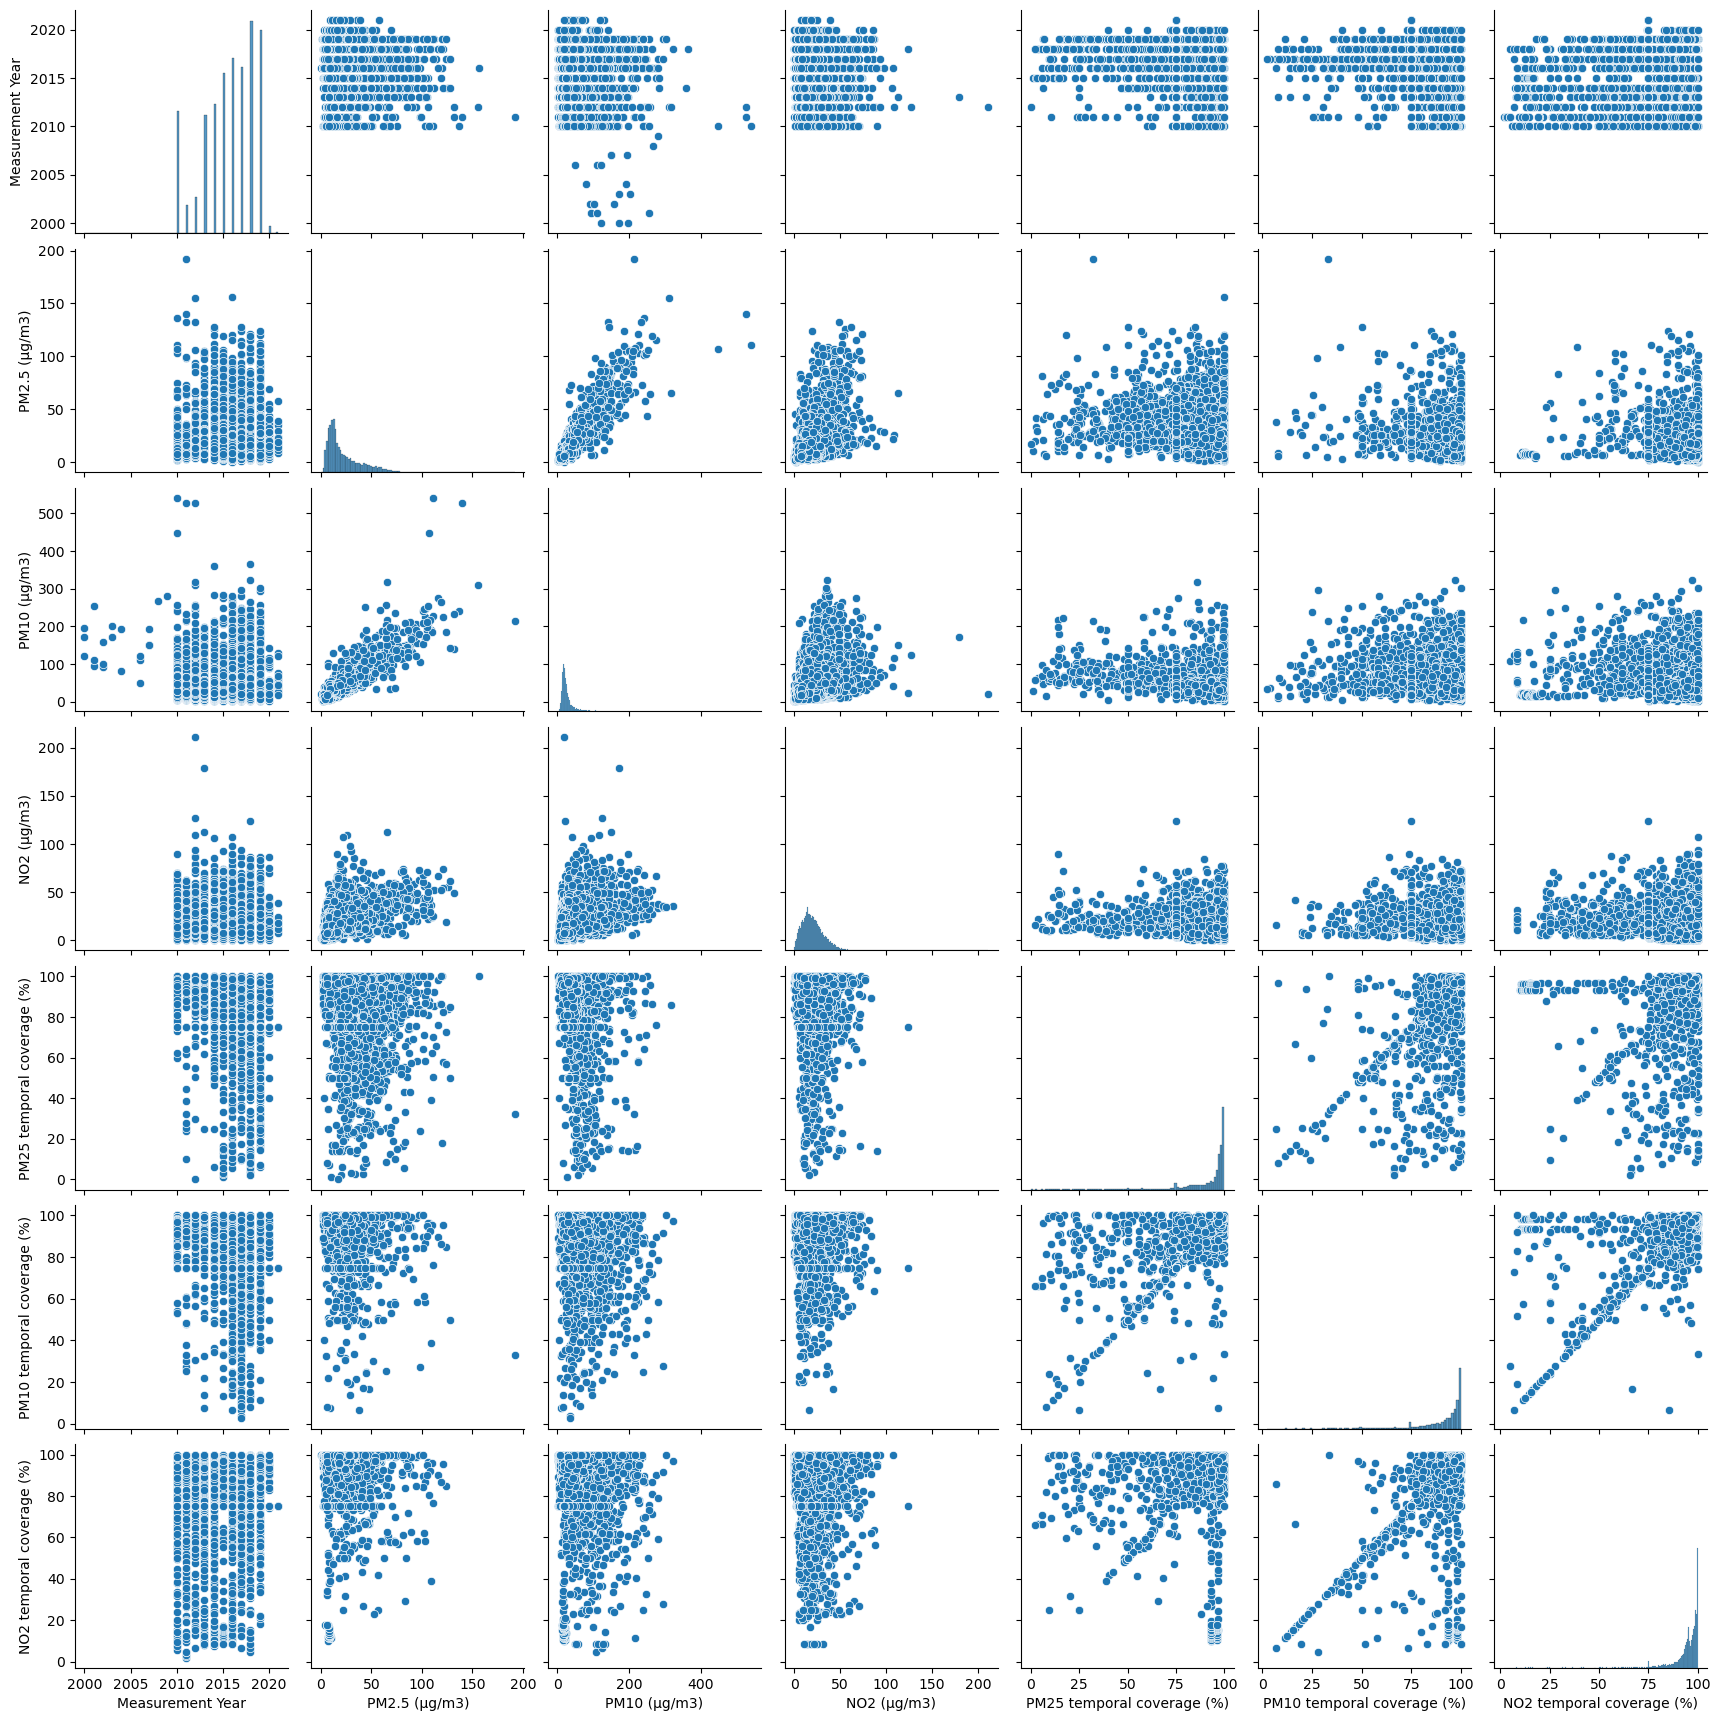

In [17]:
sns.pairplot(df)
plt.show()

Na pairplotcie widać relacje między zmiennymi oraz histogram każdej z nich. Zależność liniową widać pomiędzy PM2.5 oraz PM10. NO2 również posiada w jakimś stopniu zależność do PM2.5 jak i PM10, ale tego typu zależnośći zostaną zbadane dokładniej w dalszej kolejnośći. Histogramom przyjrzyjmy się dokładniej poniżej. 

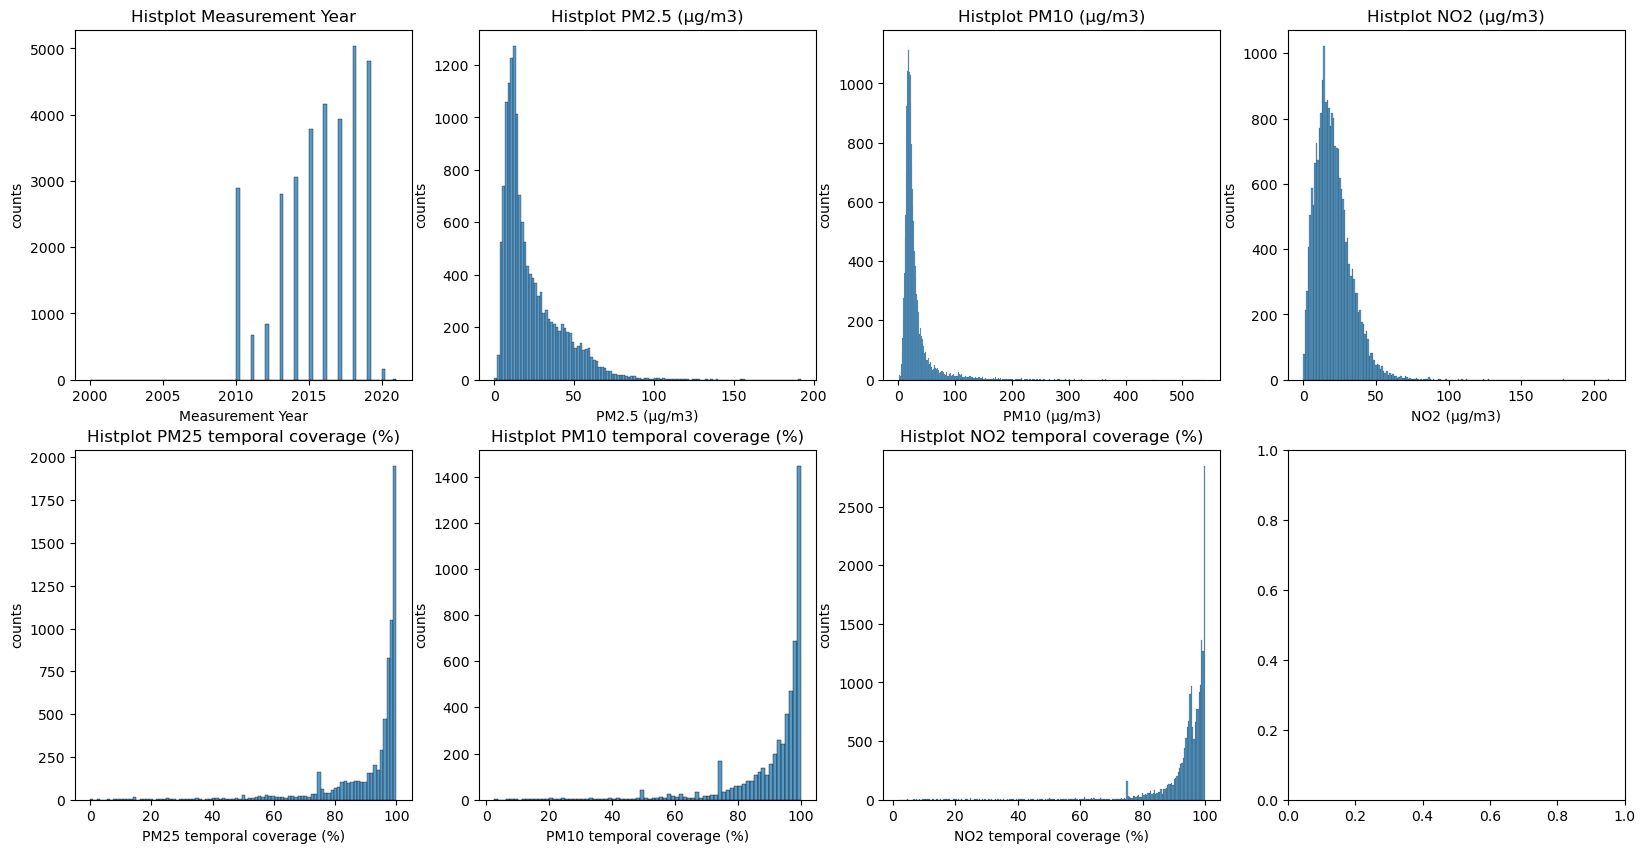

In [18]:
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

cols = numeric_columns.columns.to_list()
fig, ax = plt.subplots(2,4,figsize=(20,10))
ax = ax.flatten()

for i in range(len(cols)):
    sns.histplot(df[cols[i]], ax=ax[i])
    ax[i].set(title=f'Histplot {cols[i]}', ylabel='counts')

plt.show()

Pierwszym wnioskiem jest obserwacja na temat czasu kiedy były zbierane dane - sensowna ilość obserwacji zaczyna pojawiać się dopiero od 2010 roku (być może wtedy nastąpił skok technologiczny dotyczący czujników lub pojawiła się większa ich dostępność na świecie). Obserwacje sprzed 2010 zostaną usunięte. Warto zauważyć, że w latach 2011-12 zanotowano spadek obserwacji a następnie nagły skok aż do 2020 kiedy wybuchła pandemia (spadek obserwacji może wynikać właśnie z niej i powodanego przez nią kryzysu na świecie - były wtedy ważniejsze sprawy do monitorowania niż jakość powietrza). Jeśli chodzi o zmiennie dotyczące PM2.5, PM10 oraz NO2 mają one rozkłady prawoskośne, natomiast wykresy dotyczące pokrycia mają rozkłady lewoskośne. To dobrze, ponieważ im mniejsze zanieczyszczenie tym lepiej dla świata, a im większe pokrycie tym lepiej, bo dane są dokładniejsze i pozwalają na bardziej wiarygodne analizy.

In [19]:
df2010 = df[df['Measurement Year']>=2010].reset_index(drop=True)
print(len(df), len(df2010)) # niewielka róznica około 20 rekordów

32186 32165


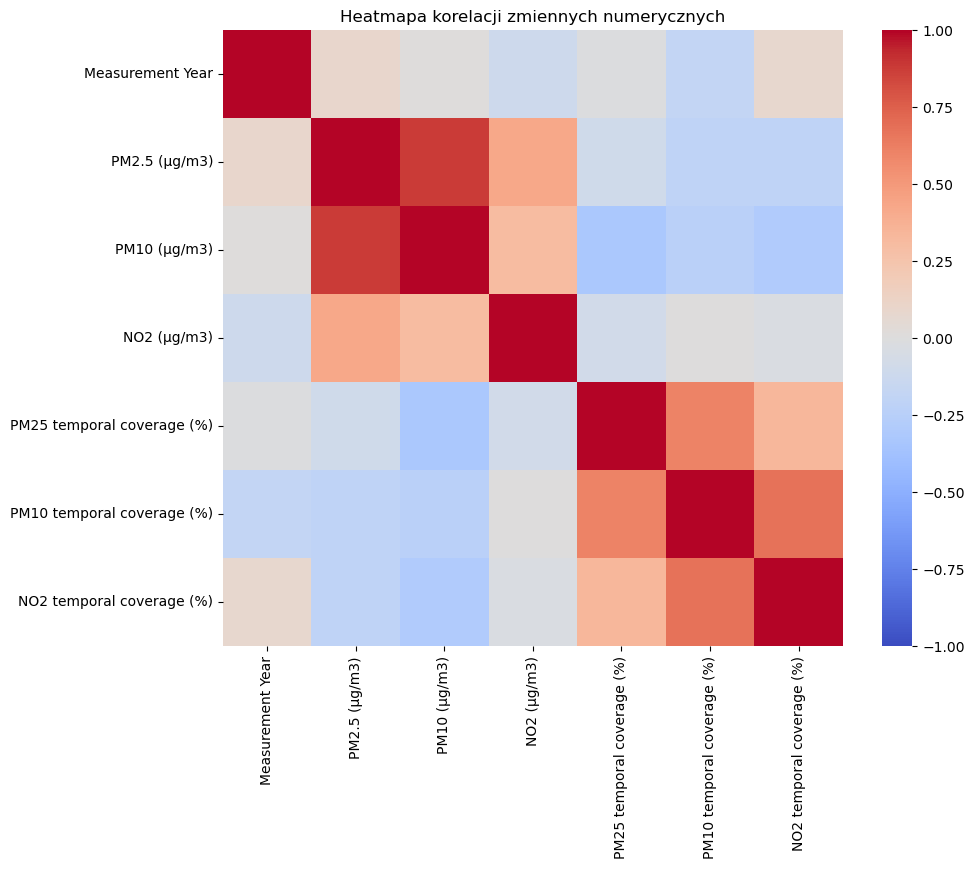

In [20]:
numeric_columns = df2010.select_dtypes(include=['float64', 'int64'])

correlation = numeric_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Heatmapa korelacji zmiennych numerycznych')
plt.show()

Z heatmapy wypływa podobny wniosek jak z pairplotu - występuje związek między PM2.5 oraz PM10, a w mniejszym stopniu między NO2 oraz PM2.5 jak i NO2 oraz PM10. Podobnie dla tych samych par wygląda sytuacja dla zmiennych dotyczących pokrycia.

Poniżej przedstawiono jak wygląda zanieczyszczenie na przestrzeni lat.

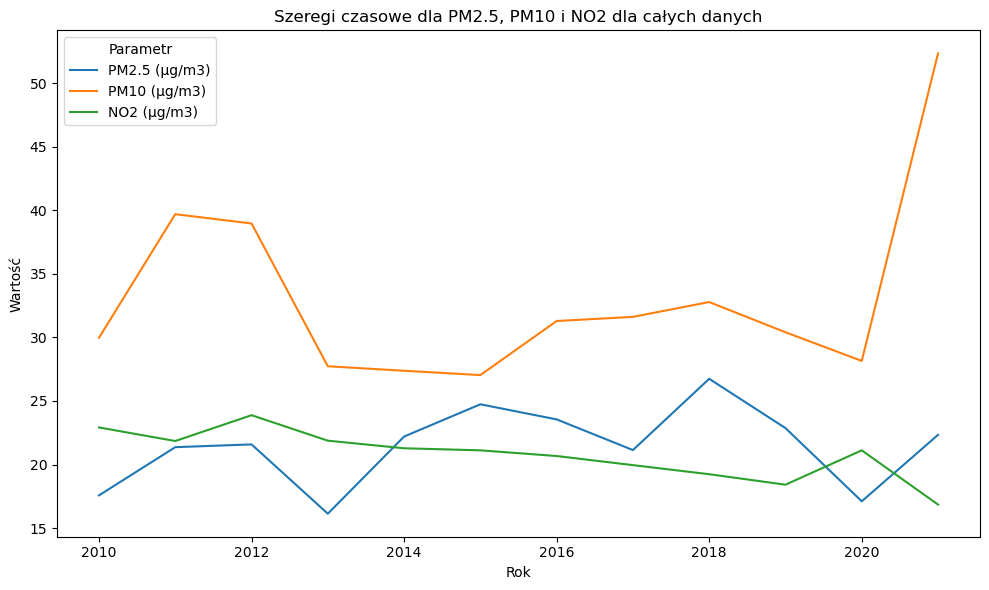

In [21]:
columns = ['PM2.5 (μg/m3)', 'PM10 (μg/m3)', 'NO2 (μg/m3)']
plt.figure(figsize=(10, 6))

for column in columns:
    sns.lineplot(data=df2010, x='Measurement Year', y=column, label=column, errorbar=None)

plt.title('Szeregi czasowe dla PM2.5, PM10 i NO2 dla całych danych')
plt.xlabel('Rok')
plt.ylabel('Wartość')
plt.legend(title='Parametr')
plt.tight_layout()
plt.show()

Największe zanieczyszczenie powoduje PM10, natomiast PM2.5 oraz NO2 wypadają dosyć podobnie. Można zauważyć, że nie ma wielu wspólnych tendencji dla wszystkich 3 parametrów na raz - ewentualnie stosunkowa stabilność w latach 2014-2017.

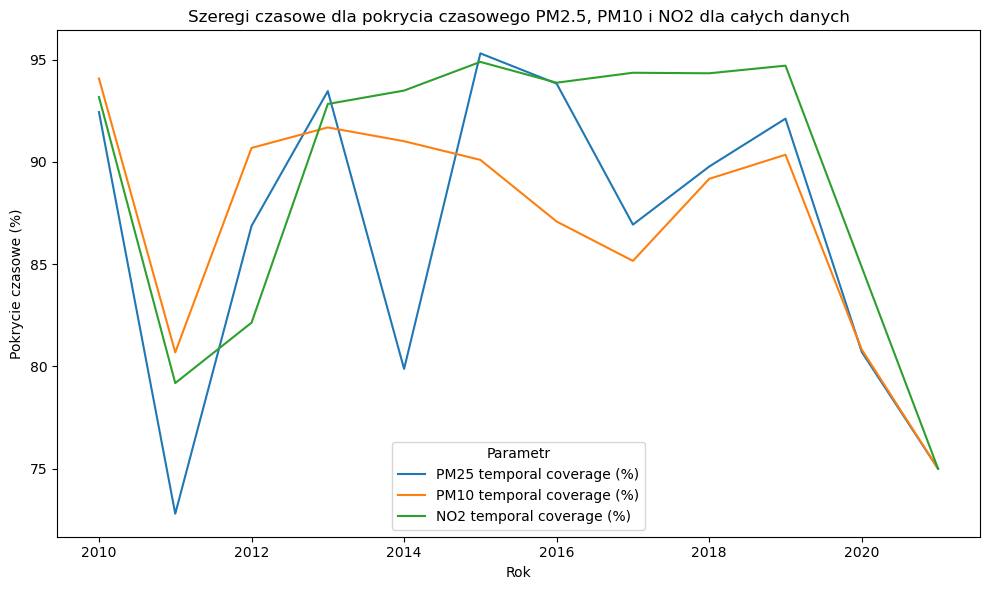

In [22]:
columns_cov = ['PM25 temporal coverage (%)', 'PM10 temporal coverage (%)', 'NO2 temporal coverage (%)']

plt.figure(figsize=(10, 6))

for column in columns_cov:
    sns.lineplot(data=df2010, x='Measurement Year', y=column, label=column, errorbar=None)

plt.title('Szeregi czasowe dla pokrycia czasowego PM2.5, PM10 i NO2 dla całych danych')
plt.xlabel('Rok')
plt.ylabel('Pokrycie czasowe (%)')
plt.legend(title='Parametr')
plt.tight_layout()
plt.show()

Dla NO2 pokrycie wygląda najstabilniej - dane po podejrzanych latach 2011-12 utrzymywał się aż do pandemii na stałym wysokim poziomie, dane były zbierane przez więcej niż 90% czasu w roku. Najmniej stabilnie przedstawia się PM2.5, może to wynikać z jakości czujników lub problemów technicznych.

## Analiza na poziomie regionów

In [23]:
len(df2010['WHO Region'].unique()) # 6 regionów - wizualizacje będą czytelne

6

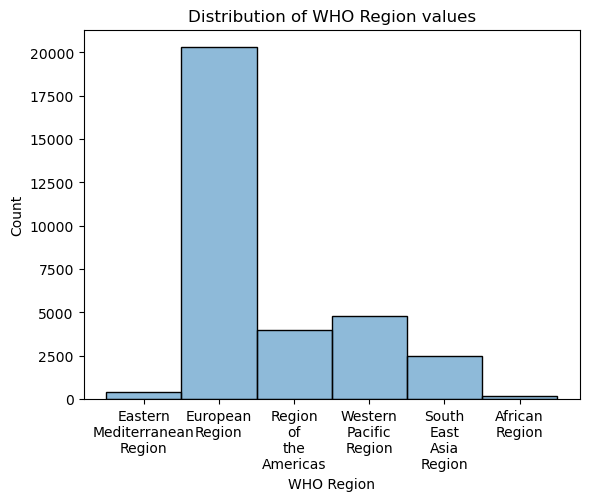

In [24]:
x_ticks = [x.replace(" ", "\n") for x in df2010["WHO Region"].unique()]
sns.histplot(data=df2010, x="WHO Region",bins=20, alpha=0.5)
plt.xticks(ticks=np.arange(len(x_ticks)),labels=x_ticks)
plt.title(f'Distribution of WHO Region values')
plt.show()


W regionie europejskim zebrano zdecydowanie najwięcej danych, należy pamiętać o tym podczas dalszych analiz - gdy patrzymy na dane całościowo może wystąpić "europejski bias". Poniżej przedstawionio wykresy pudełkowe zmiennych PM2.5, PM10, NO2 z podziałem na regiony oraz rozkładem danej zmiennej dla odniesienia. 

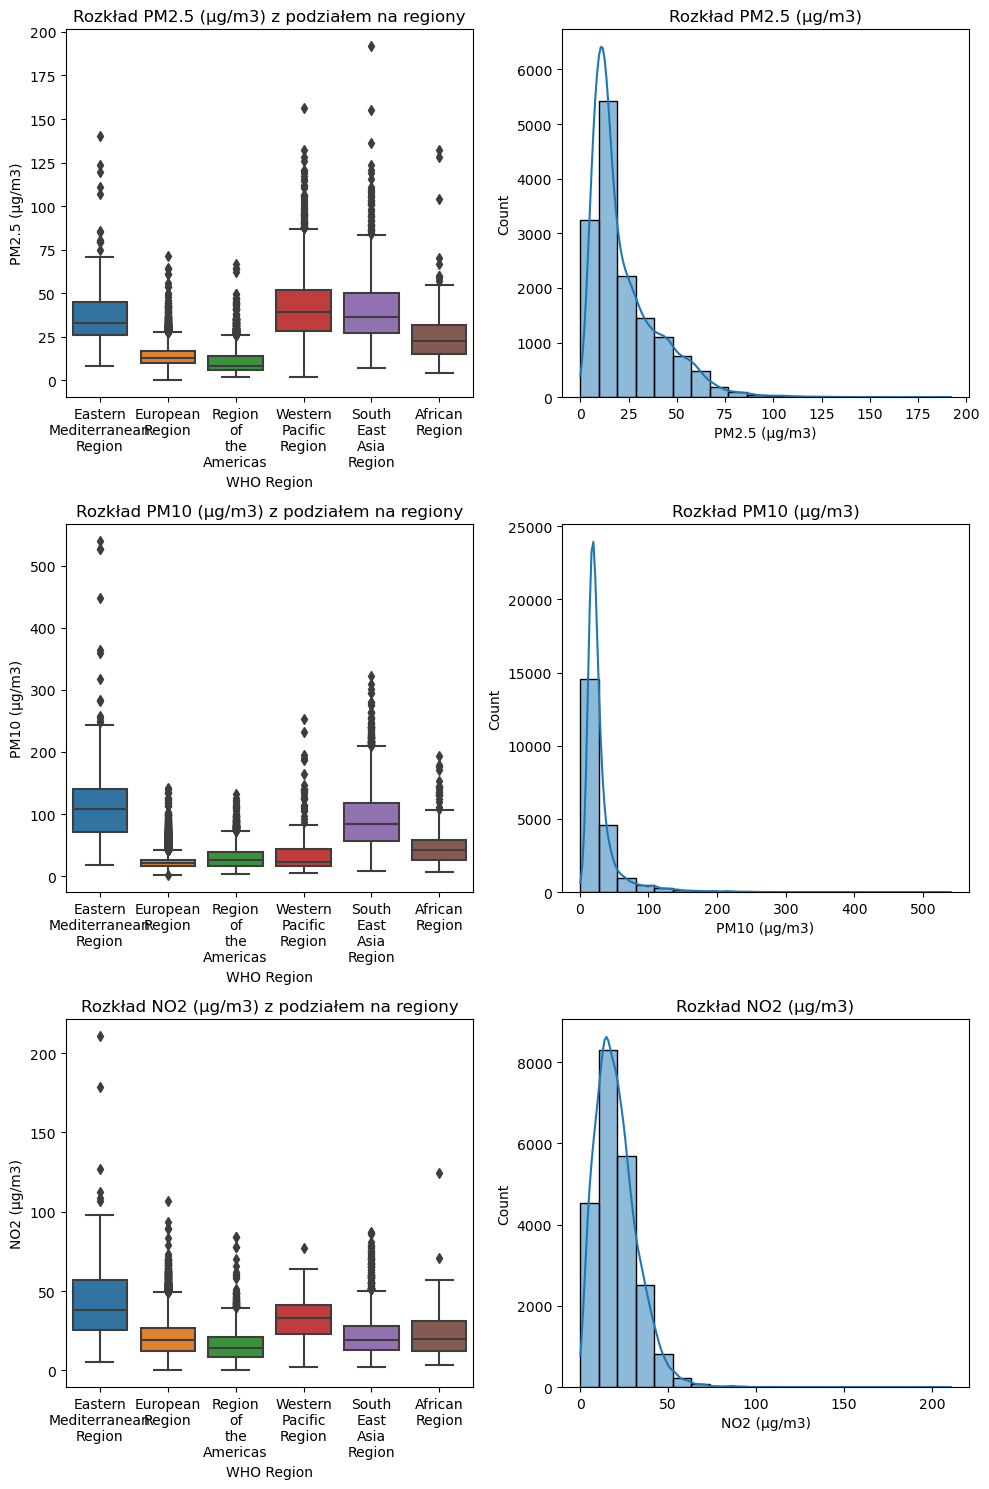

In [25]:
fig, ax = plt.subplots(3,2, figsize=(10,15))

for i, column in enumerate(columns):   
    sns.boxplot(data=df2010, y=column, x='WHO Region', ax=ax[i,0])
    ax[i,0].set_xticks(ticks=np.arange(len(x_ticks)), labels=x_ticks)
    ax[i,0].set_title(f'Rozkład {column} z podziałem na regiony')

    sns.histplot(data=df2010, x=column, kde=True, bins=20, ax=ax[i,1], alpha=0.5)
    ax[i,1].set_title(f'Rozkład {column}')

plt.tight_layout()
plt.show()


Z wizualizacji można zauważyć, że większość obserwacji skupia się wokół mniejszych wartości, ale widać sporo outlierów w górnej części wykresów pudełkowych. 

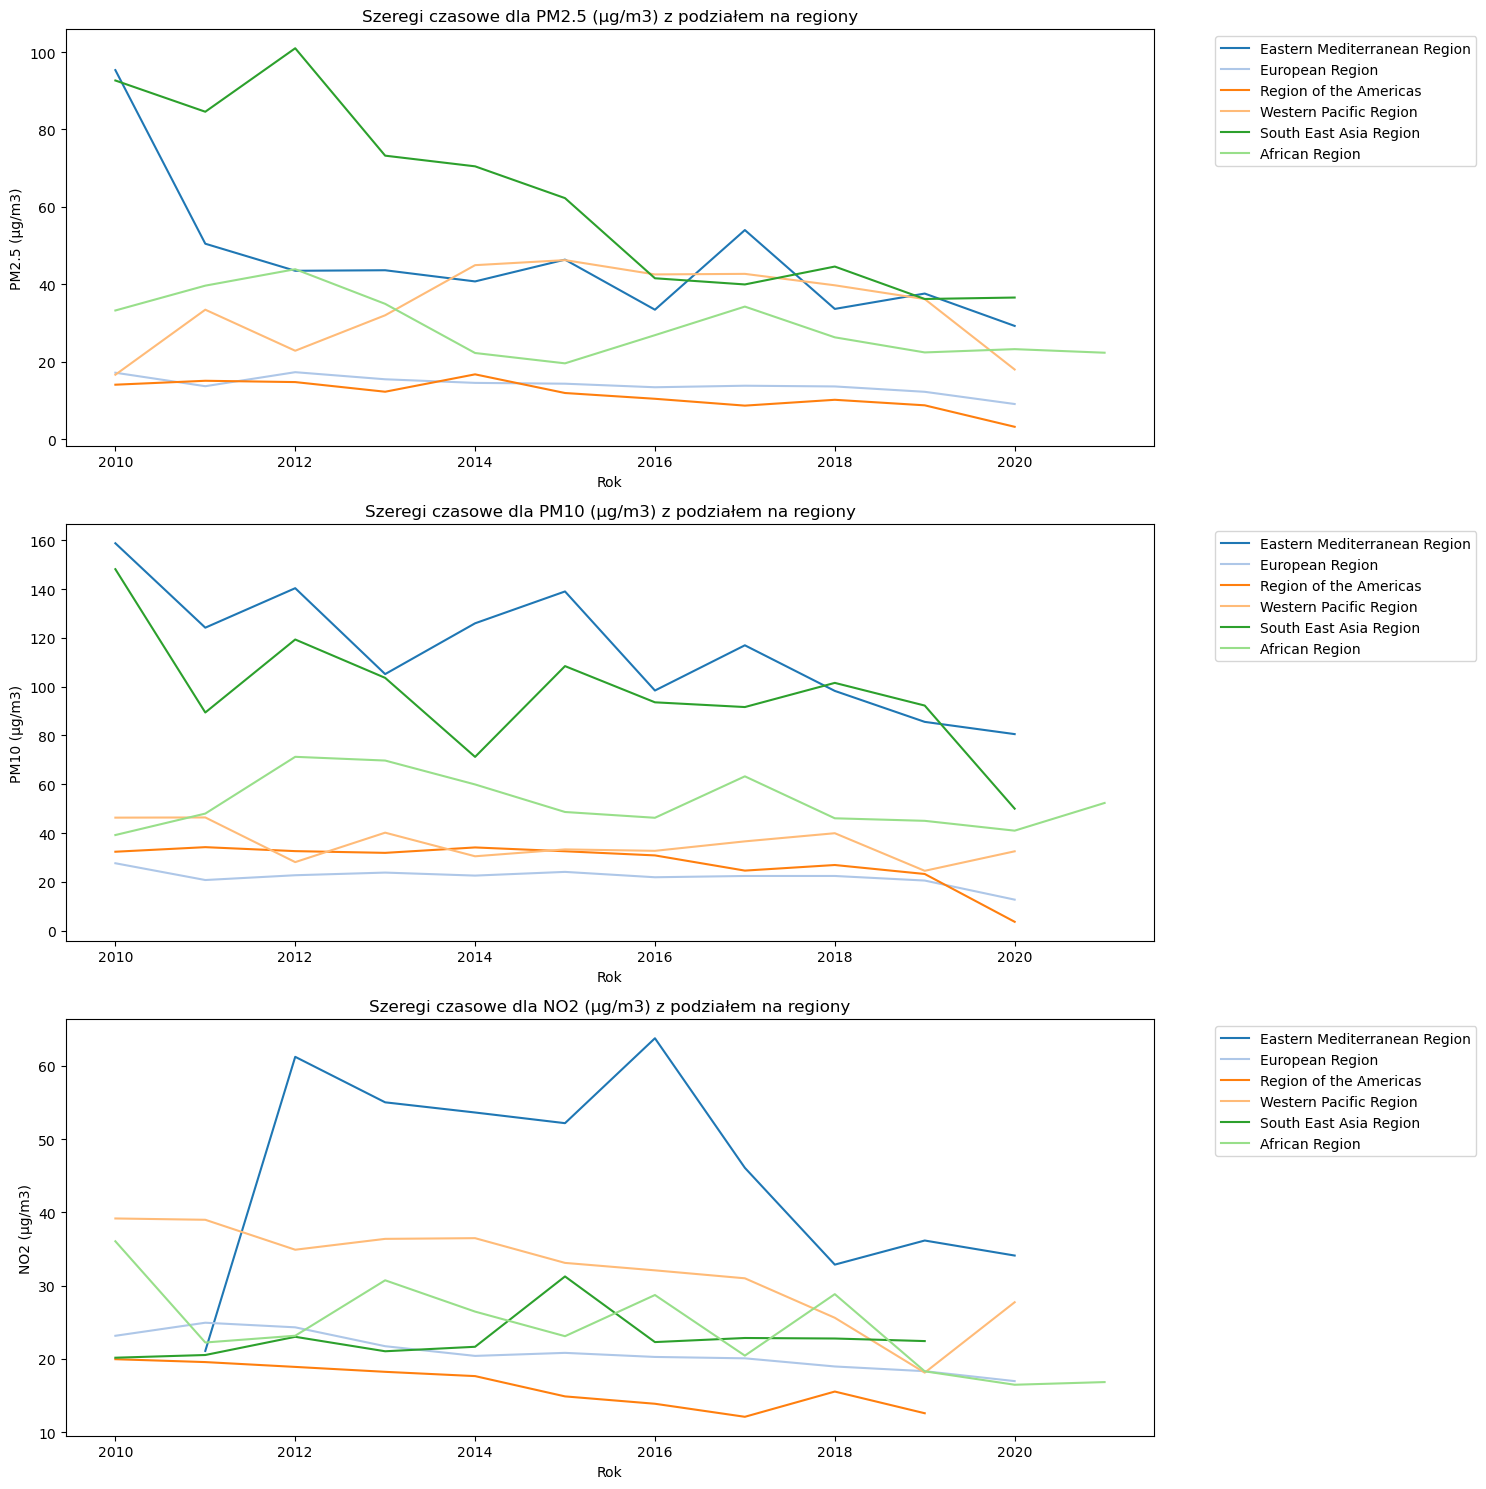

In [26]:
fig, ax = plt.subplots(3, 1, figsize=(15, 15))
for i, column in enumerate(columns):
    sns.lineplot(data=df2010, x='Measurement Year', y=column, hue='WHO Region', ax=ax[i], errorbar=None, palette='tab20')
    ax[i].set_title(f'Szeregi czasowe dla {column} z podziałem na regiony')
    ax[i].set_ylabel(column)
    ax[i].set_xlabel('Rok')
    ax[i].legend(bbox_to_anchor=(1.05, 1), loc='upper left')


plt.tight_layout()
plt.show()

Napawającym optymizmem wnioskiem jest to, że z czasem zanieczyszczenie ma tendencje do spadku (wszystkie 3 parametry).

## Analiza na poziomie krajów

In [27]:
len(df2010['WHO Country Name'].unique())

118

Krajów jest za dużo, aby czytelnie zwizualizować ich cechy. Postanowiono wybrać po 2 kraje dla każdego regionu z największą ilością rekordów, aby były reprezentatywne.

In [28]:
def top_countries_with_counts(group):
    counts = group['WHO Country Name'].value_counts().nlargest(2)
    return list(zip(counts.index, counts.values))

top_countries_by_region = df2010.groupby('WHO Region').apply(top_countries_with_counts).reset_index(name='Top Countries')
top_countries = [country[0] for sublist in top_countries_by_region['Top Countries'] for country in sublist]
top_countries = list(set(top_countries))

df_countries = df2010[df2010['WHO Country Name'].isin(top_countries)]
print(len(df_countries))
top_countries_by_region


15492


WHO Region  \
0                African Region   
1  Eastern Mediterranean Region   
2               European Region   
3        Region of the Americas   
4        South East Asia Region   
5        Western Pacific Region   

                                       Top Countries  
0             [(South Africa, 145), (Mauritius, 11)]  
1  [(Iran (Islamic Republic of), 204), (Kuwait, 62)]  
2                   [(Italy, 3129), (Germany, 2601)]  
3  [(United States of America, 1776), (Canada, 986)]  
4                   [(India, 2265), (Thailand, 110)]  
5                  [(China, 3967), (Australia, 236)]

Warto zauważyć, że dla Afryki mamy bardzo mało obserwacji w porównaniu do innych regionów - aby o tym pamiętać pozostawiono wybrane kraje do dalszej analizy. Poniżej rozkład wartości dla wybranych państw.

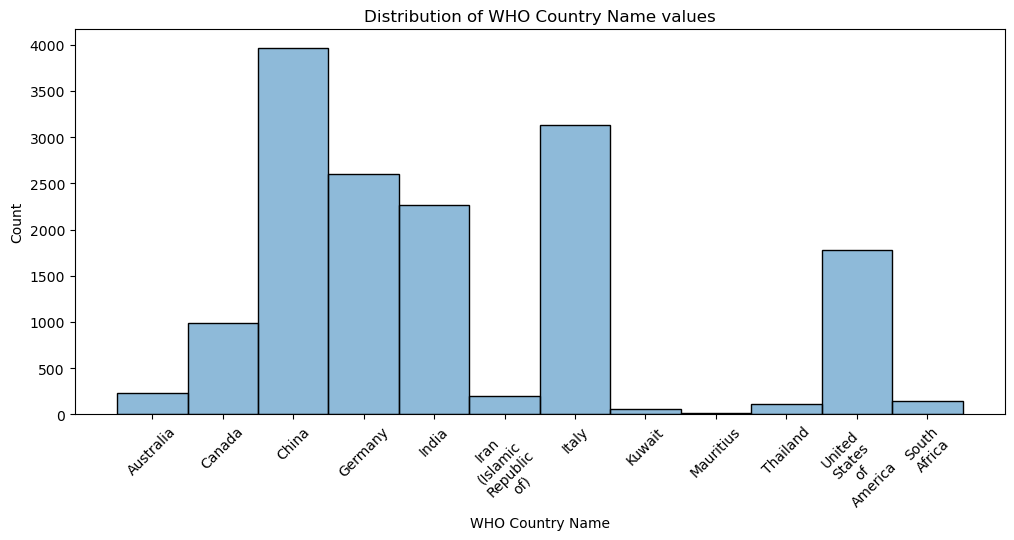

In [29]:
x_ticks = [x.replace(" ", "\n") for x in df_countries["WHO Country Name"].unique()]
fig, ax = plt.subplots(1,1,figsize=(12,5))
sns.histplot(ax=ax,data=df_countries, x="WHO Country Name",bins=20, alpha=0.5)
plt.xticks(ticks=np.arange(len(x_ticks)),labels=x_ticks, rotation=45)
plt.title(f'Distribution of WHO Country Name values')
plt.show()


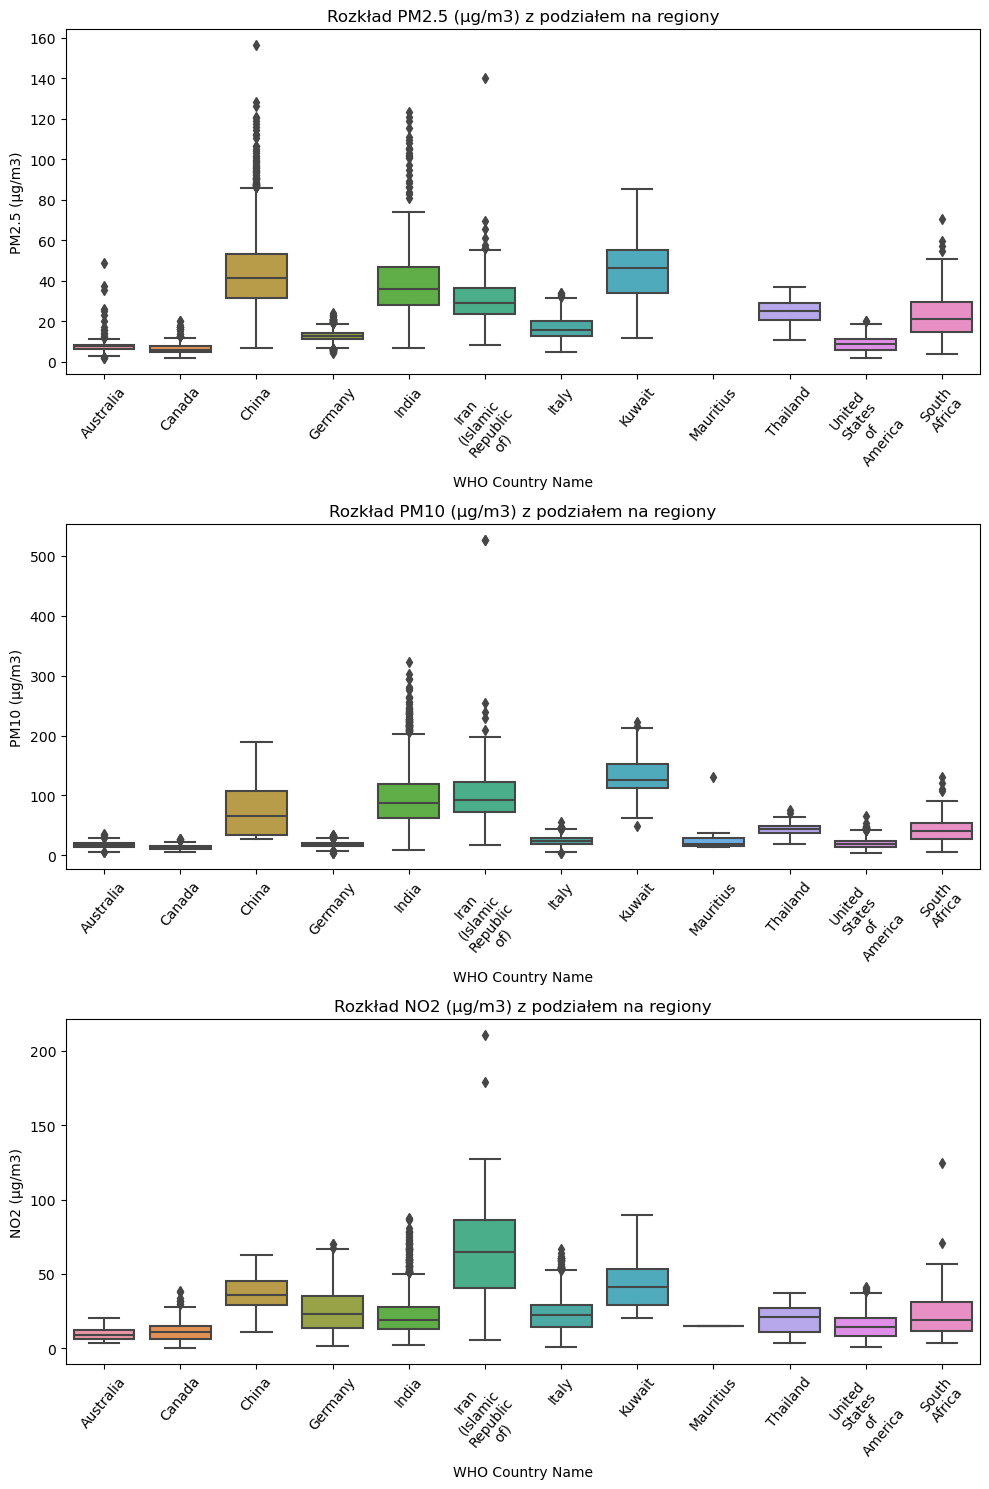

In [30]:
columns = ['PM2.5 (μg/m3)', 'PM10 (μg/m3)', 'NO2 (μg/m3)']

fig, ax = plt.subplots(3,1, figsize=(10,15))

for i, column in enumerate(columns):   
    sns.boxplot(data=df_countries, y=column, x='WHO Country Name', ax=ax[i])
    ax[i].set_xticks(ticks=np.arange(len(x_ticks)), labels=x_ticks)
    ax[i].set_title(f'Rozkład {column} z podziałem na regiony')
    ax[i].set_xticklabels(x_ticks, rotation = 50)

plt.tight_layout()
plt.show()


Podobnie jak przy analizie regionów widać, że większość wartości skupia się w dolnej części boxplotów. Natomiast na tym poziomie granularności widać rozbieżności w ilości pomiarów dla poszczególnych regionów.

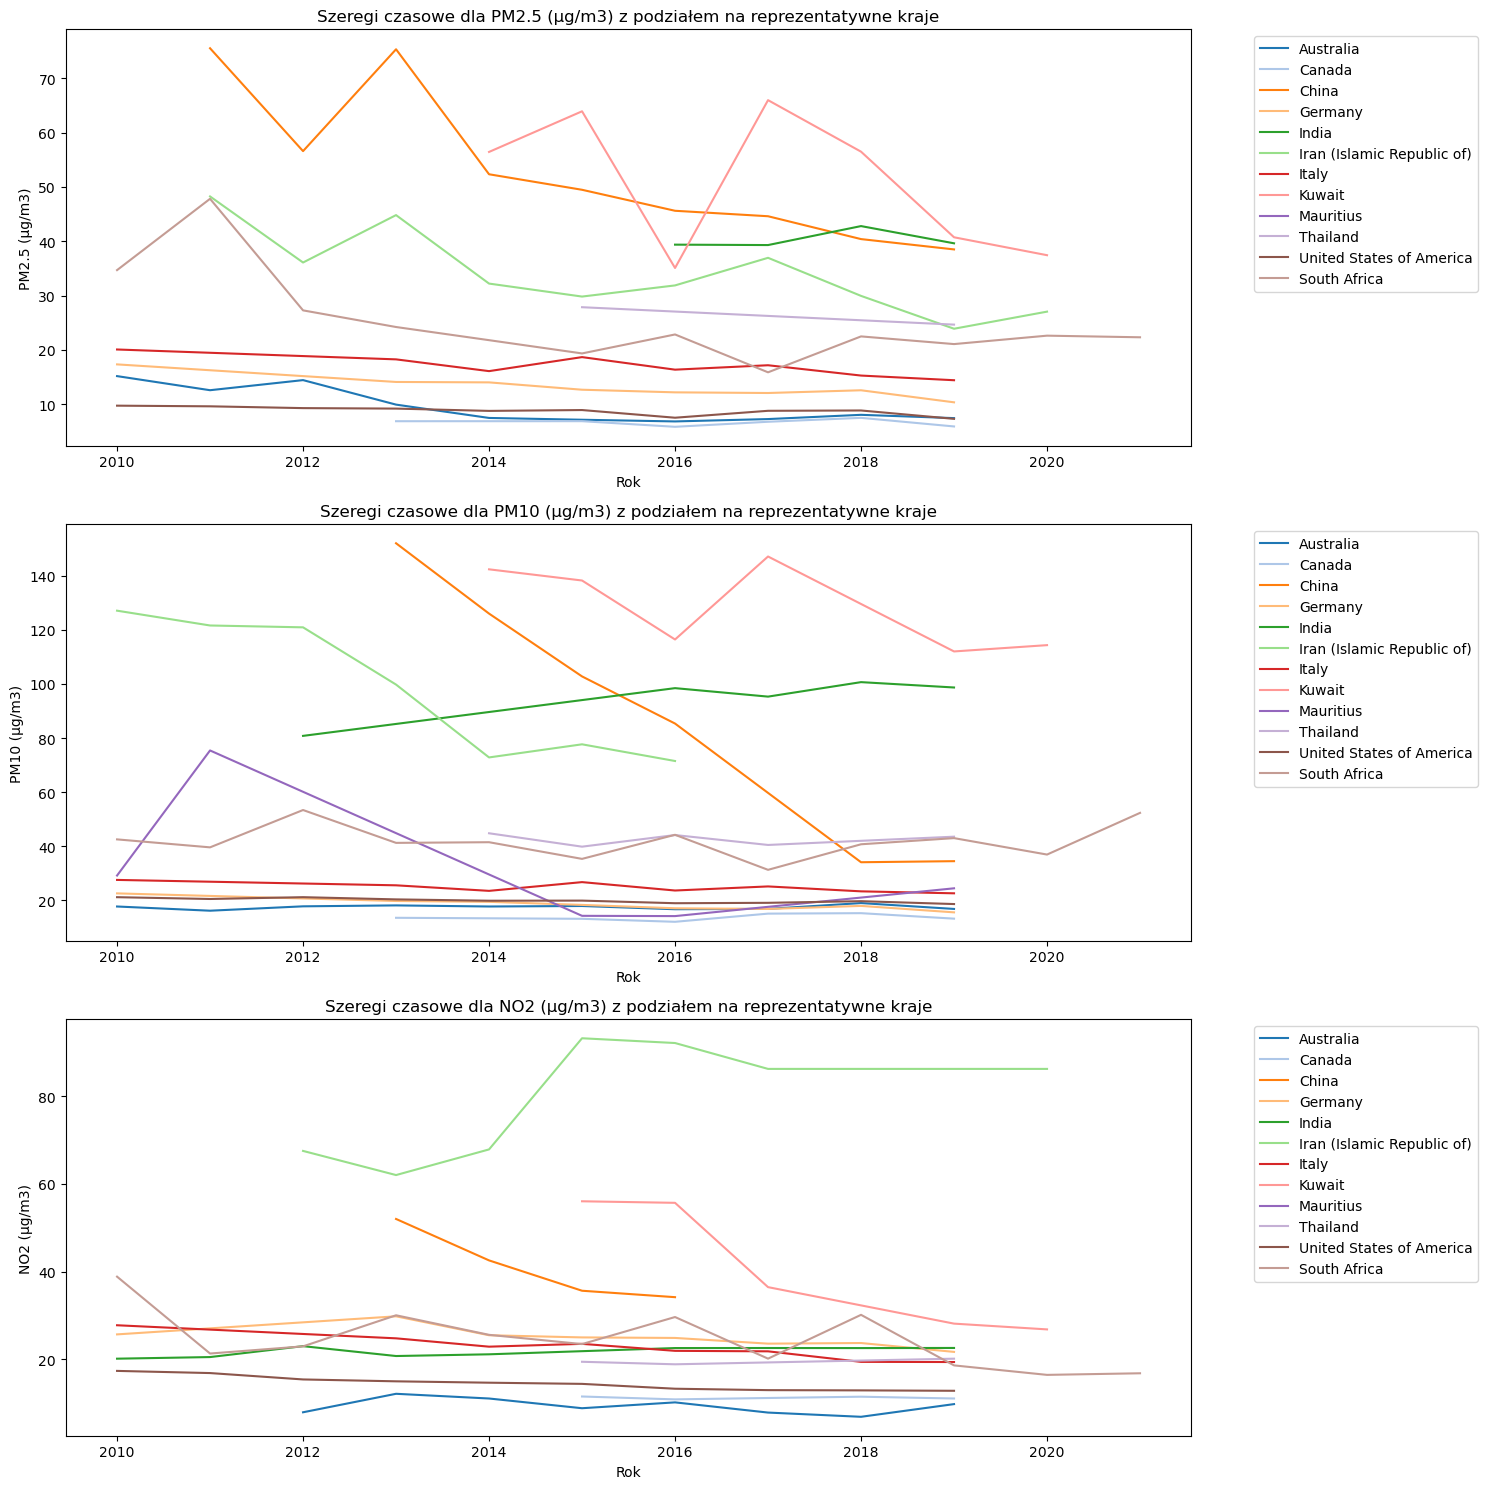

In [31]:
fig, ax = plt.subplots(3, 1, figsize=(15, 15))
for i, column in enumerate(columns):
    sns.lineplot(data=df_countries, x='Measurement Year', y=column, hue='WHO Country Name', ax=ax[i], errorbar=None, palette='tab20')
    ax[i].set_title(f'Szeregi czasowe dla {column} z podziałem na reprezentatywne kraje')
    ax[i].set_ylabel(column)
    ax[i].set_xlabel('Rok')
    ax[i].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

## Analiza na poziomie miast

In [32]:
len(df2010['City or Locality'].unique())

6871

Analogicznie jak dla miast zostaną wybrane tylko reprezentatywne państwa w oparciu o regiony.

In [33]:
def top_cities_with_counts(group):
    counts = group.groupby(['City or Locality', 'WHO Country Name']).size().nlargest(2)
    return list(zip(counts.index.get_level_values(0), counts.index.get_level_values(1), counts.values))

top_cities_by_region = df2010.groupby('WHO Region').apply(top_cities_with_counts).reset_index(name='Top Cities')
top_cities = [city[0] for sublist in top_cities_by_region['Top Cities'] for city in sublist]
top_cities = list(set(top_cities))

df_cities = df2010[df2010['City or Locality'].isin(top_cities)]
print(len(df_cities))
top_cities_by_region


146


WHO Region  \
0                African Region   
1  Eastern Mediterranean Region   
2               European Region   
3        Region of the Americas   
4        South East Asia Region   
5        Western Pacific Region   

                                          Top Cities  
0  [(Ethekwini, South Africa, 13), (Gert Sibande,...  
1  [(Tehran, Iran (Islamic Republic of), 11), (Ab...  
2  [(Avully, Switzerland, 17), (Basel, Switzerlan...  
3  [(Lima, Peru, 12), (Albuquerque (Nm), United S...  
4  [(Bhubneshwar, India, 10), (Chittagong, Bangla...  
5  [(Seoul, Republic of Korea, 13), (Busan, Repub...

Jako, że dane są zbierane co rok, a widać wartości np. 17 to widać, że coś jest nie w porządku, postanowiono przyjrzeć się danym.

In [34]:
df_cities

WHO Region ISO3      WHO Country Name  \
20     Eastern Mediterranean Region  ARE  United Arab Emirates   
21     Eastern Mediterranean Region  ARE  United Arab Emirates   
22     Eastern Mediterranean Region  ARE  United Arab Emirates   
23     Eastern Mediterranean Region  ARE  United Arab Emirates   
24     Eastern Mediterranean Region  ARE  United Arab Emirates   
...                             ...  ...                   ...   
32083                African Region  ZAF          South Africa   
32084                African Region  ZAF          South Africa   
32085                African Region  ZAF          South Africa   
32086                African Region  ZAF          South Africa   
32087                African Region  ZAF          South Africa   

      City or Locality  Measurement Year  PM2.5 (μg/m3)  PM10 (μg/m3)  \
20           Abu Dhabi              2011            NaN        158.18   
21           Abu Dhabi              2012            NaN        165.30   
22           Abu Dhabi              2013            NaN        143.75   
23           Abu Dhabi              2014            NaN        108.60   
24           Abu Dhabi              2015            NaN        149.75   
...                ...               ...            ...           ...   
32083     Gert Sibande              2017          22.45         45.94   
32084     Gert Sibande              2018          17.10         41.90   
32085     Gert Sibande              2019          15.42         38.86   
32086     Gert Sibande              2020          19.59         31.91   
32087     Gert Sibande              2021          22.74         48.10   

       NO2 (μg/m3)  PM25 temporal coverage (%)  PM10 temporal coverage (%)  \
20           36.72                         NaN                         NaN   
21           38.22                         NaN                         NaN   
22           37.74                         NaN                         NaN   
23           39.58                         NaN                         NaN   
24           38.05                         NaN                         NaN   
...            ...                         ...                         ...   
32083        23.66                        75.0                        75.0   
32084        19.42                        75.0                        75.0   
32085        23.09                        75.0                        75.0   
32086        17.66                        75.0                        75.0   
32087        14.88                        75.0                        75.0   

       NO2 temporal coverage (%)  \
20                           NaN   
21                           NaN   
22                           NaN   
23                           NaN   
24                           NaN   
...                          ...   
32083                       75.0   
32084                       75.0   
32085                       75.0   
32086                       75.0   
32087                       75.0   

                                          Reference  \
20                   Environment Agency - Abu Dhabi   
21                   Environment Agency - Abu Dhabi   
22                   Environment Agency - Abu Dhabi   
23                   Environment Agency - Abu Dhabi   
24                   Environment Agency - Abu Dhabi   
...                                             ...   
32083  South African Air Quality Information System   
32084  South African Air Quality Information System   
32085  South African Air Quality Information System   
32086  South African Air Quality Information System   
32087  South African Air Quality Information System   

                  Number and type of monitoring stations  
20     1 City Centre, 1 Industrial, 1 Road Side, 2 Ur...  
21     1 City Centre, 2 Industrial, 1 Road Side, 2 Ur...  
22     1 City Centre, 2 Industrial, 1 Road Side, 4 Ur...  
23     1 City Centre, 2 Industrial, 1 Road Side, 4 Ur...  
24     1 City Centre, 2 Indus

Dane zawierają duplikaty z różnicą jedynie w kolumnie Number and type of monitoring stations. Jako, że kluczowe parametry są te same postanowiono pozbyć się tej kolumny a następnie usunąć duplikaty.

In [35]:
df_unique = df2010.drop(columns=['Number and type of monitoring stations'])
df_unique = df_unique.drop_duplicates()
print(len(df2010),len(df_unique))

32165 32069


Widać, że zniknęło około 100 rekordów - nie ma to większego wpływu na poprzednie analizy, więc nie wprowadzano żadnych korekt.

In [36]:
top_cities_by_region = df_unique.groupby('WHO Region').apply(top_cities_with_counts).reset_index(name='Top Cities')
top_cities = [city[0] for sublist in top_cities_by_region['Top Cities'] for city in sublist]
top_cities = list(set(top_cities))

df_cities = df_unique[df_unique['City or Locality'].isin(top_cities)]
print(len(df_cities))
top_cities_by_region

130


WHO Region  \
0                African Region   
1  Eastern Mediterranean Region   
2               European Region   
3        Region of the Americas   
4        South East Asia Region   
5        Western Pacific Region   

                                          Top Cities  
0  [(Gert Sibande, South Africa, 12), (Nkangala, ...  
1  [(Tehran, Iran (Islamic Republic of), 11), (Ab...  
2  [(Avully, Switzerland, 11), (Basel, Switzerlan...  
3  [(Lima, Peru, 12), (Albuquerque (Nm), United S...  
4  [(Bhubneshwar, India, 10), (Dhaka, Bangladesh,...  
5  [(Busan, Republic of Korea, 11), (Chungcheongb...

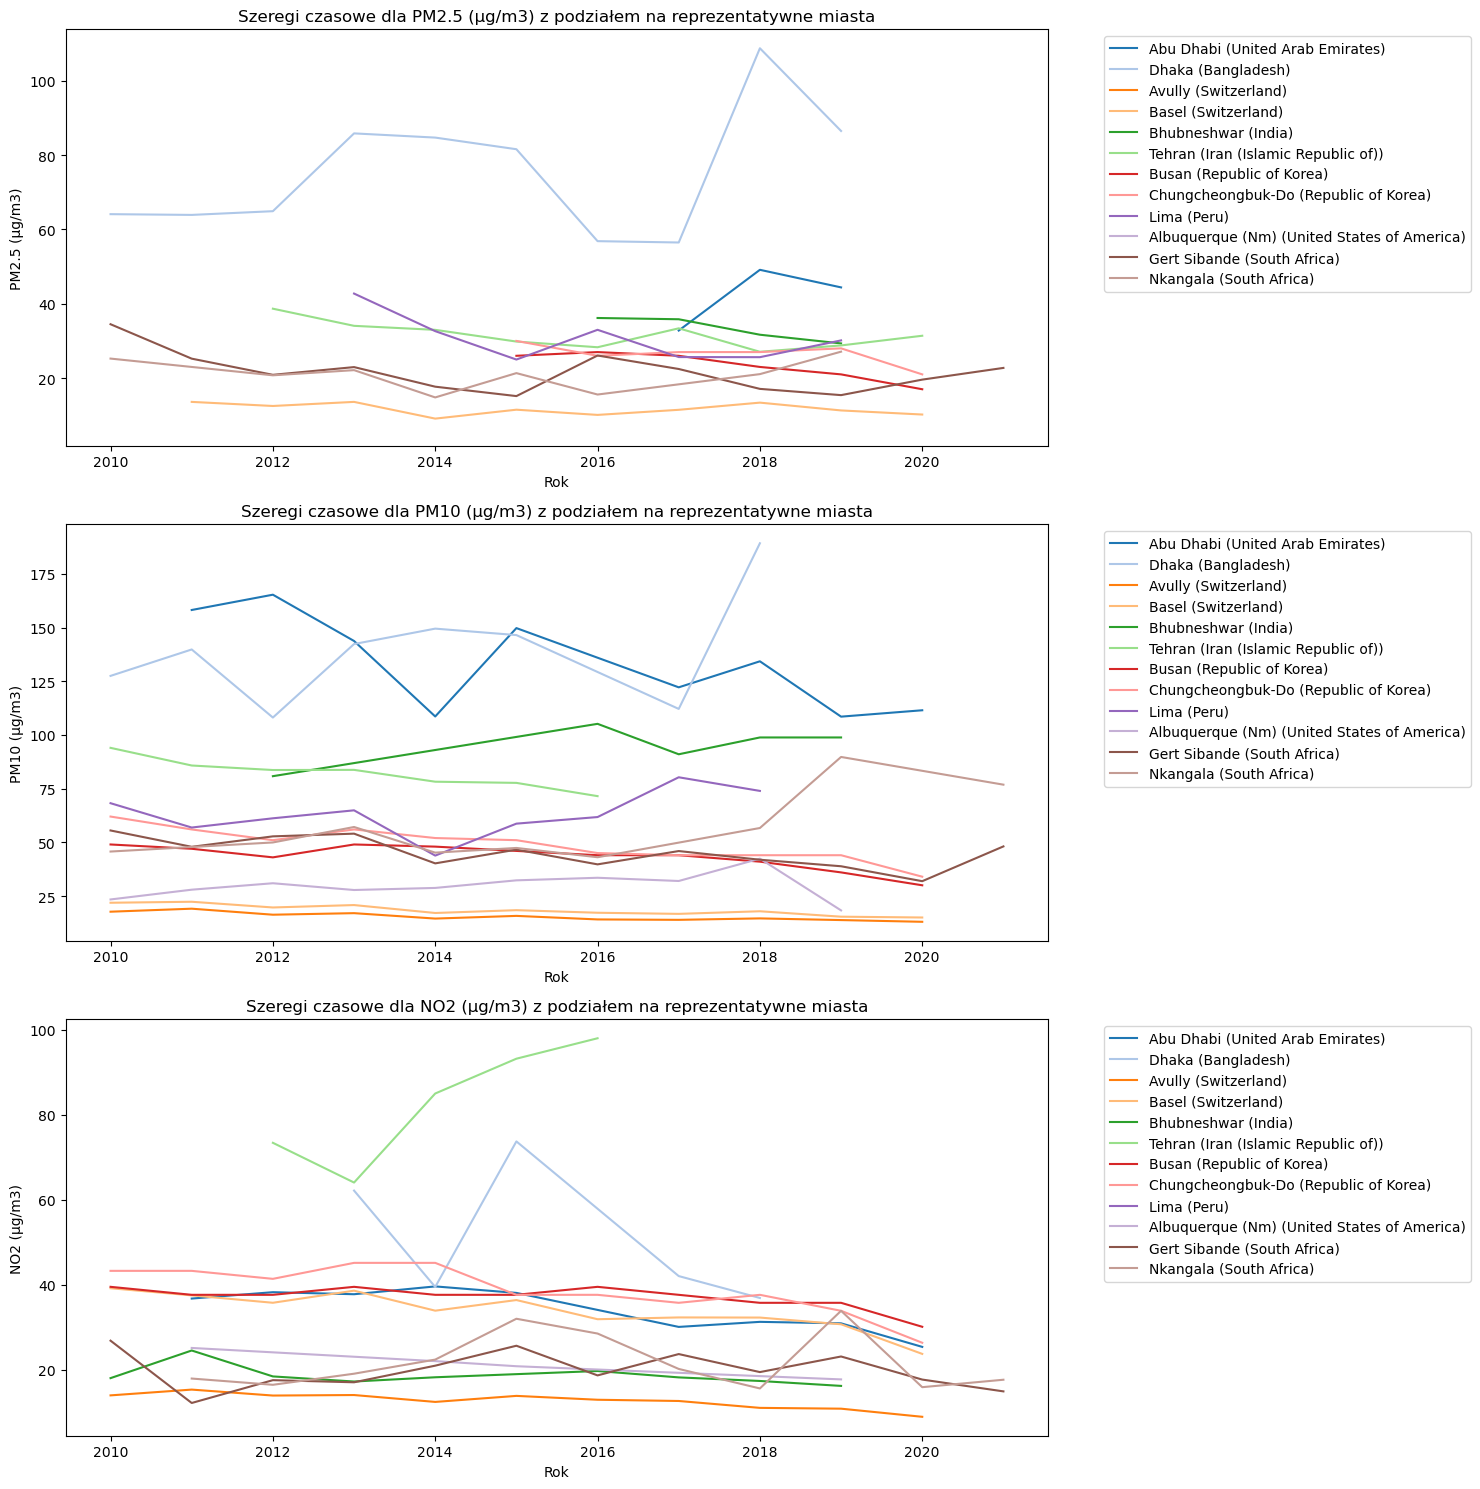

In [37]:
fig, ax = plt.subplots(3, 1, figsize=(15, 15))

for i, column in enumerate(columns):
    sns.lineplot(data=df_cities, x='Measurement Year', y=column, hue='City or Locality', ax=ax[i], errorbar=None, palette='tab20')
    handles, labels = ax[i].get_legend_handles_labels()
    new_labels = [f"{label} ({df_cities[df_cities['City or Locality'] == label]['WHO Country Name'].iloc[0]})" for label in labels]
    ax[i].legend(handles, new_labels,  bbox_to_anchor=(1.05, 1), loc='upper left')
    ax[i].set_title(f'Szeregi czasowe dla {column} z podziałem na reprezentatywne miasta')
    ax[i].set_ylabel(column)
    ax[i].set_xlabel('Rok')

plt.tight_layout()
plt.show()

## Mapa

In [38]:
mean_pollution = df_unique.groupby(['WHO Country Name','ISO3'])[['PM2.5 (μg/m3)', 'PM10 (μg/m3)', 'NO2 (μg/m3)']].mean().reset_index()

for col in columns:
    fig = px.choropleth(
        mean_pollution,
        locations='ISO3',  
        locationmode='ISO-3',  
        color=col,  
        hover_name='WHO Country Name',  
        projection='natural earth',  
        title=f'Średnie wartości {col} dla całości danych (lata 2010-2021)'
    )

    fig.show()

Na pytania wylistowane na UPELu częsciowo odpowiedzinao w komentarzach i analizach powyżej. Poniżej jednak znajduje się podsumowanie i wypunktowane najważniejsze wnioski:
- dane obejmują (po oczyszczeniu) okres czasu 2010-2021
- ilość czujników z czasem zwiększa się co jest dość logiczne, z czasem kraje rozwijają się - mimo wszystko kraje biedne są w dużo gorszej sytuacji, np. Afryka jest opisana bardzo małą ilością danych
- podczas interpretacji należy pamiętać o coverage, jeśli jest niski mamy do czynienia z obciążeniem i możliwymi błędnymi wnioskami
- w Europie mamy najwięcej czujników, a tym samym zebranych pomiarów
- w krajach wysoko rozwiniętych zanieczyszczenia mają z czasem tendencje spadkowe - jakość powietrza poprawia się 
- najgorzej sytuacja wygląda w krajach takich jak Iran, Chiny, Mongolia, Irak, Indie - jakość powietrza jest tam wyraźnie gorsza

Związki przyczynowo-skutkowe:
- parametry dotyczące zanieczyszczenia powietrza są ze sobą silnie dodatnio skorelowane (tak należało się spodziewać)
- analogicznie dla kolumn dotyczących pokrycia owych parametrów
- mała ilość danych dla poszczególnych rejonów może powodować gorszą jakość analiz, obciążenie, błędne wnioski
- jeżeli kraj jest bogaty/rozwijający się to jakość powietrza polepsza się (ogólne stiwerdzenie, zawsze znajdą się wyjątki od reguły) oraz są tam dokładnie zbierane dane, jest dużo czujników
- kraje biedniejsze mają gorszą jakość powietrza oraz mniejszą ilość czujników

Kontekst ML:
- dane mogłyby być materiałem treningowym dla modelu przewidującego jakość powietrza, ale jakość takiego działania mogłaby być wątpliwa
- w danych znajduje się dużo wartości brakujących, a więc model nie byłby się w stanie dobrze nauczyć
- agregacja na poziomie roku również nie daje możliwości dokładnej eksploracji danych
- dane pochodzą z ogranicznego okresu, a rejony z których są zbierane różnią się między sobą ilością i jakością - utrudnienie dla treningu modelu